## Moving Average Based Forecasting Models

## Importing relevant packages

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the data and extracting time series data

In [2]:
df = pd.read_csv('EL_Month.csv')

In [3]:
df1 = df[['Month','Series 1']]

In [4]:
df2 = df[['Month','Series 2']]

In [5]:
data1 = df1['Series 1']

In [6]:
data = pd.DataFrame(data1, columns=['Series 1'])

Train Test Split

In [7]:
train_size = int(len(data) * 0.85)
test_size = len(data) - train_size
train, test = data[0:train_size], data[train_size:len(data)]
print(len(train), len(test))

173 31


# Converting Object Data Type into Float

In [8]:
C = []
for z in range(len(train['Series 1'])):
  a1 = train['Series 1'][z].replace(",","")
  b1 = float(a1)
  #print(b1)
  C.append(b1)

In [9]:
D = []
for z12 in range(len(train),len(train)+ len(test['Series 1'])):
  #print(z1)
  a1 = test['Series 1'][z12].replace(",","")
  b1 = float(a1)
  #print(b1)
  c1 = test['Series 1'][z12].replace(",","")
  d1 = float(a1)
  #print(d1)
  D.append(d1)

In [10]:
CD = np.append(C,D)
DC = np.append(C,D)

In [11]:
len_o = len(CD)

In [12]:
CD[204-10:204]

array([ 8659.,  8117.,  8973.,  8778.,  8948.,  9161.,  8188.,  7949.,
       10277., 13828.])

In [13]:
## Function for generating 12 forecasts using rolling averages
for i in range(len(CD)):
  a_series = CD[len_o-12:len_o]
  import statistics

  a_mean = statistics.mean(a_series)
  CD = np.append(CD,a_mean)
  if len(CD) >  len_o+12:
    break

In [14]:
Data12 = pd.DataFrame({'Month':df['Month'],'Values':DC})

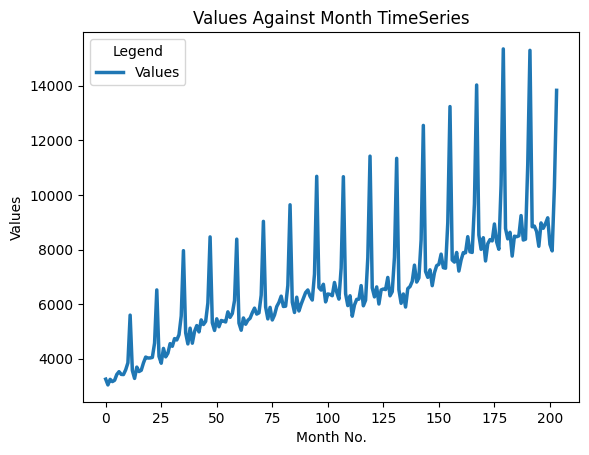

In [15]:
sns.lineplot(data=Data12[['Month', 'Values']],linewidth=2.5, palette="tab10")

# plot two columns using Seaborn with labels and legend
#sns.lineplot(data=df[['x', 'y1', 'y2']], linewidth=2.5, palette="tab10")
plt.xlabel('Month No.')
plt.ylabel('Values')
plt.title('Values Against Month TimeSeries')
plt.legend(title='Legend', loc='upper left')

In [16]:
Data3 = Data12.iloc[len(Data12)-40:len(Data12)]

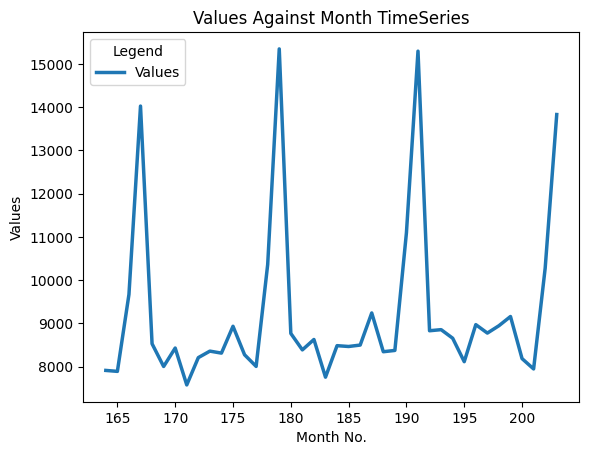

In [17]:
sns.lineplot(data=Data3[['Month', 'Values']],linewidth=2.5, palette="tab10")

# plot two columns using Seaborn with labels and legend
#sns.lineplot(data=df[['x', 'y1', 'y2']], linewidth=2.5, palette="tab10")
plt.xlabel('Month No.')
plt.ylabel('Values')
plt.title('Values Against Month TimeSeries')
plt.legend(title='Legend', loc='upper left')

In [18]:
# Calculate 10-day Simple Moving Average (SMA)
CD1 = Data12['Values'].rolling(10).mean()

# Generating 12 forecasts using Moving Averages

In [19]:
twelve_predictions = CD[len(CD)-12:len(CD)]

In [20]:
twelve_predictions

array([9213.91666667, 9213.91666667, 9213.91666667, 9213.91666667,
       9213.91666667, 9213.91666667, 9213.91666667, 9213.91666667,
       9213.91666667, 9213.91666667, 9213.91666667, 9213.91666667])

In [21]:
twelve_predictions_df = pd.DataFrame(twelve_predictions, columns=['Predictions'])

In [22]:
twelve_predictions_df.to_csv("MovingAverage_Forecasting_Predictions.csv")

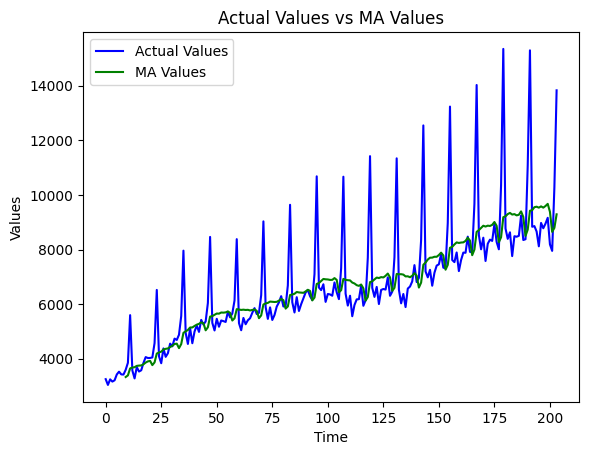

In [23]:
# Comparison plot b/w actual values & MA values
plt.plot(Data12['Values'], label="Actual Values", color="blue")
plt.plot(CD1, label="MA Values", color="green")
plt.title("Actual Values vs MA Values")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()

## Exponential Moving Average Forecasting

In [24]:
## com is the decay rate

In [25]:
ema = Data12['Values'].ewm(com=0.1).mean()

In [26]:
ema

0       3253.000000
1       3059.583333
2       3229.180451
3       3169.921448
4       3207.265818
           ...     
199     9140.322950
200     8274.574814
201     7978.597710
202    10068.054337
203    13486.186758
Name: Values, Length: 204, dtype: float64

In [27]:
import matplotlib.pyplot as plt

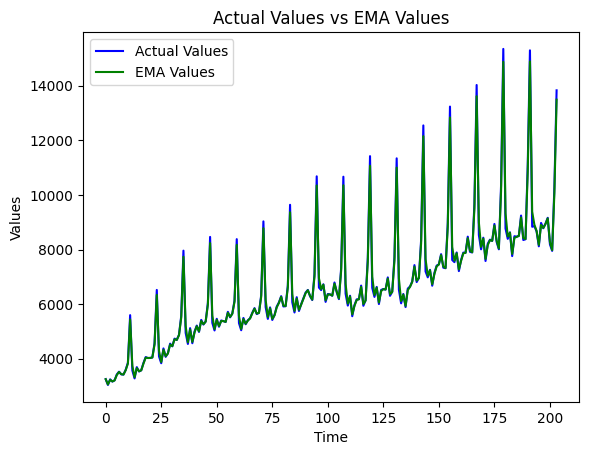

In [28]:
# Comparison plot b/w stock values & EMA
plt.plot(Data12['Values'], label="Actual Values", color="blue")
plt.plot(ema, label="EMA Values", color="green")
plt.title("Actual Values vs EMA Values")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()